In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    "housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

In [17]:
ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(region_name = housing_raw["region_name"].str[0:-11])
)

In [18]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [23]:
sd_dual = (
    ca_housing
    .loc[ca_housing["region_name"] == "San Diego",
        ["inventory", "median_active_list_price", "period_begin"]]
    .set_index("period_begin")
    .sort_index()
)

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


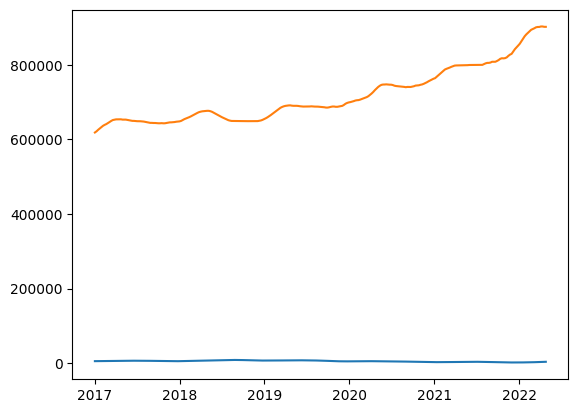

In [24]:
fig, ax = plt.subplots()

ax.plot(sd_dual)

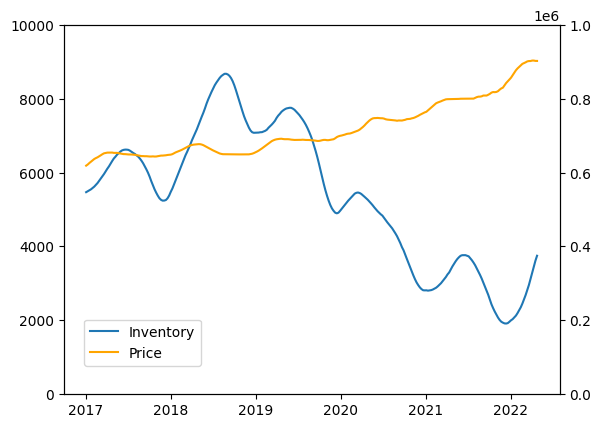

In [25]:
fig, ax = plt.subplots()

ax.plot(sd_dual["inventory"], label="Inventory")
ax.set_ylim(0, 10000)

ax2 = ax.twinx()

ax2.plot(sd_dual["median_active_list_price"], label = "Price", c="orange")
ax2.set_ylim(0, 1000000)

fig.legend(bbox_to_anchor=(.35, .28))

plt.show()